<h1>Decision Tree

In [2]:
import pandas as pd
import math

# Load data from CSV file
data = pd.read_csv(r'play_tennis.csv')

# Remove the 'day' column
data.drop(columns=['day'],inplace=True)

# Set the target attribute
target = 'play'

# Calculate entropy of a dataset based on the 'play' attribute
def entropy(df):
    s = df[target]
    p = len(s[s == "Yes"])
    n = len(s[s == "No"])
    a = p / (p + n)
    b = n / (p + n)
    
    if a == 0:
        return -round(b * math.log2(b), 2)
    elif b == 0:
        return -round(a * math.log2(a), 2)
    
    return -round((a * math.log2(a) + b * math.log2(b)), 2)

# Select the root attribute for the decision tree
def root_selection(df):
    attr = df.columns[:-1]
    n = len(df)
    root = ''
    q = 0
    
    for att in attr:
        unique = df[att].unique()
        s = 0
        e = entropy(df)
        
        for u in unique:
            s += (len(df[df[att] == u]) / n) * entropy(df[df[att] == u])
        
        if (e - s) > q:
            q = e - s
            root = att
            
    return root

# Initialize the decision tree
tree = {}
df = data
root = root_selection(df)
current_root = [root, df.index]
tree[current_root[0]] = []
opened = [current_root]

# Construct the decision tree
while len(opened) != 0:
    current_root = opened.pop(0)
    for child in data[current_root[0]].unique():
        df = data.iloc[current_root[-1]]
        tree[current_root[0]].append(child)
        p = len(df[df[current_root[0]] == child][df[target] == 'Yes'])
        n = len(df[df[current_root[0]] == child][df[target] == 'No'])
        
        if p == 0:
            tree[child] = 'No'
        elif n == 0:
            tree[child] = 'Yes'
        else:
            d1 = df[df[current_root[0]] == child]
            r = root_selection(d1)
            tree[child] = [r]
            tree[r] = []
            opened.append([r, d1.index])

# Print the constructed decision tree
for i in tree:
    print(i, tree[i])


C:\Users\Krishna Kausik\AppData\Local\Temp\ipykernel_1720\2134728305.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p = len(df[df[current_root[0]] == child][df[target] == 'Yes'])
C:\Users\Krishna Kausik\AppData\Local\Temp\ipykernel_1720\2134728305.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n = len(df[df[current_root[0]] == child][df[target] == 'No'])


outlook ['Sunny', 'Overcast', 'Rain']
Sunny ['humidity']
humidity ['High', 'Normal']
Overcast Yes
Rain ['wind']
wind ['Weak', 'Strong']
High No
Normal Yes
Weak Yes
Strong No


# **Backpropagation**

In [ ]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5 #Setting training iterations
lr=0.1 #Setting learning rate

inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 1 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)

    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)#how much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad

    wout += hlayer_act.T.dot(d_output) *lr   # dotproduct of nextlayererror and currentlayerop
    wh += X.T.dot(d_hiddenlayer) *lr

    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X))
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

-----------Epoch- 1 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.73872352]
 [0.73597939]
 [0.74083794]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.73991353]
 [0.73710471]
 [0.74207589]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.74108758]
 [0.73821511]
 [0.743297  ]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.74224598]
 [0.73931089]
 [0.744

# **EM - Algorithm**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


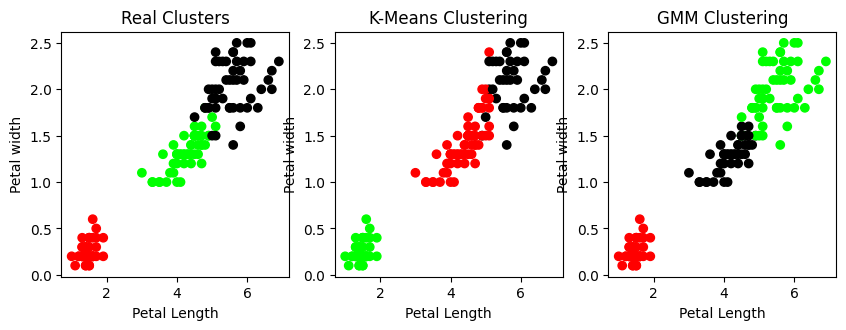

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np

iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
# Build the K Means Model
model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.figure(figsize=(10,7))
colormap = np.array(['red', 'lime', 'black'])
# Plot the original Classifications using Petal features
plt.subplot(2, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_width, c=colormap[y.Targets])
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.subplot(2, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_width, c=colormap[model.labels_])
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
gmm_y=gmm.predict(X)
plt.subplot(2, 3, 3)
plt.scatter (X.Petal_Length, X.Petal_width, c=colormap[gmm_y])
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')